# 1. Analysis of samples

In this notebook, we analyze the samples. 

## Libraries

In [1]:
import pandas as pd
import scikits.bootstrap as bootstrap  
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import numpy as np
output_dir = '../reports/figures/'

## Counts

In [2]:
freq = 'Y' # on what resolution should we concatenate the data. Default is month

ad_meta = pd.read_csv('../data/processed/counts.csv')
ad_meta['date'] = pd.to_datetime(ad_meta['date'])
ad_meta = ad_meta[ad_meta['total_count'] != 0]

#ad_meta2 = ad_meta[(ad_meta['men_count'] > 0) | ad_meta['women_count'] > 0] # Remove 0 values

x = ad_meta.set_index('date').groupby(pd.Grouper(freq=freq)).sum().reset_index()['date']
y_men = ad_meta.set_index('date').groupby(pd.Grouper(freq=freq))['men_count'].sum()
y_women = ad_meta.set_index('date').groupby(pd.Grouper(freq=freq))['women_count'].sum()

df = pd.DataFrame(list(zip(x, y_women, y_men)), columns=['date', 'count_f', 'count_m'])
df['year'] = df['date'].dt.year

df.reset_index(inplace=True)

df['count_f.s'] = (df['count_f'] - df['count_f'].mean()) / df['count_f'].std()
df['count_m.s'] = (df['count_m'] - df['count_m'].mean()) / df['count_m'].std()

In [3]:
CIs_f = ad_meta.set_index('date').groupby(pd.Grouper(freq=freq))['women_count'].apply(lambda x:bootstrap.ci(data=x, statfunction=np.mean))
CIs_m = ad_meta.set_index('date').groupby(pd.Grouper(freq=freq))['men_count'].apply(lambda x:bootstrap.ci(data=x, statfunction=np.mean))

In [4]:
upper_x_m = [x[1] for x in CIs_m]
lower_x_m = [x[0] for x in CIs_m]
mean_x_m = ad_meta.set_index('date').groupby(pd.Grouper(freq=freq))['men_count'].mean()

upper_x_f = [x[1] for x in CIs_f]
lower_x_f = [x[0] for x in CIs_f]
mean_x_f = ad_meta.set_index('date').groupby(pd.Grouper(freq=freq))['women_count'].mean()

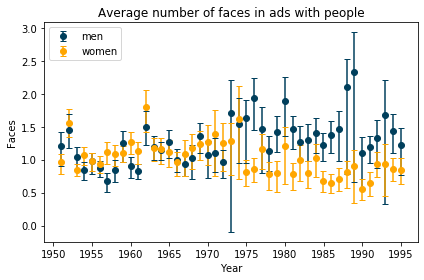

In [8]:
#plt.plot(mean_x)
plt.errorbar(mean_x_m.index, mean_x_m, yerr=[upper_x_m - mean_x_m, mean_x_m - lower_x_m], capsize=3, fmt='o',  label='men', color='#003f5c')
plt.errorbar(mean_x_f.index, mean_x_f, yerr=[upper_x_f - mean_x_f, mean_x_f - lower_x_f], capsize=3, fmt='o', label='women', color='#ffa600')
plt.ylabel('Faces')
plt.xlabel('Year')
plt.tight_layout()
plt.title('Average number of faces in ads with people')
plt.legend()
plt.tight_layout()
plt.savefig(output_dir + '/average_faces.png', dpi=180)

This scatter plot shows that females are less frequent in ads and they also seem to decrease faster than men